In [1]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import time

In [2]:
def gaussian_distribution(M_injection, sigma):
    M_recovered = np.random.normal(M_injection, sigma)
    M_recovered = np.array([M_recovered])
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [3]:
 def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                         random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [4]:
M_inj = 10 + (20 - 10)*np.random.random(100000)
M_rec = M_inj + 5
M_inj = M_inj.reshape(-1, 1)
M_rec = M_rec.reshape(-1, 1)
x_test, pred, predictor = mass_predictor(M_inj, M_rec)

/var/folders/9k/6m1gmyb90mn3rjsnkb47_8p168th5y/T/ipykernel_79960/3711120707.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [5]:
masses = np.array([15, 17, 19])
X = predictor(masses)
print(predictor(masses))

RandomForestRegressor(n_estimators=array([15, 17, 19]))


In [6]:
x_test

array([[14.21851272],
       [10.93021769],
       [14.74749205],
       ...,
       [15.20873145],
       [18.49142486],
       [13.90283857]])

In [7]:
pred

array([19.21868539, 15.9301876 , 19.74756614, ..., 20.20870039,
       23.49143078, 18.90277449])

In [8]:
predictor

sklearn.ensemble._forest.RandomForestRegressor

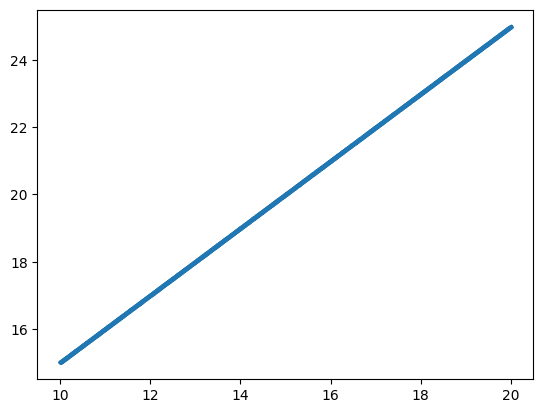

In [9]:
plt.scatter(x_test, pred, s=2)

In [ ]:
# def one_mass_prediction(amt_inj, sig):
#     st1 = time.time()
#     M_inj1 = 10 + (20 - 10)*np.random.random(amt_inj)
#     #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
#     #sigma = 0.001
#     sigma = sig
#     M_recovered_values = gaussian_distribution(M_inj1, sigma)
#     M_inj1 = M_inj1.reshape(-1, 1)
#     M_recovered_values = M_recovered_values.reshape(-1, 1)
#     X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
#     RandomForestRegressionModel = RandomForestRegressor()
#     RandomForestRegressionModel.fit(X_train, y_train)
#     y_pred = RandomForestRegressionModel.predict(X_test)
#     print(y_pred)
#     print(X_test)
#     et1 = time.time()
#     dt = et1 - st1
#     print(dt, 'time to train model')
#     df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
#     df2 = df1.corr()
#     plt.scatter(X_test, y_pred, s=2)
#     plt.xlabel('Test Masses')
#     plt.ylabel('Pred Masses')
#     plt.title("Predicting Injected Mass Values")
#     #plt.plot(X_test, y_pred, color='k')
#     plt.show()
#     mean_y_pred1 = np.mean(y_pred)
#     print(mean_y_pred1, 'average true mass prediction')
#     print(np.mean(M_inj1), 'avg mass injected')
#     error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
#     print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
#     et2 = time.time()
#     dt1 = et2 - st1
#     print(dt1,'total time to run')
#     return X_test, y_pred, df2

In [ ]:
#one_mass_prediction(10000, 0.001)

In [11]:
M_inj = mass_injections()

In [12]:
M_inj

array([[10.27145768],
       [15.9237448 ],
       [14.67648195],
       ...,
       [14.64268027],
       [16.09273463],
       [10.39698907]])

In [48]:
class SimulateInjRecPairs:
    def __init__(self, N=100000, m_min=10, m_max=20):
        """
        METHOD:
        =======
        This method produces a random distribution of masses with a given range

        INPUT:
        ======
        N: Total number of samples
        m_min: Lower bound of the masses
        m_max: Upper bound of masses

        RETURNS:
        ========
        Distribution of injected masses reshaped as (-1, 1)   
        """
        M_inj = m_min + (m_max - m_min) * np.random.random(N)
        self.M_inj = M_inj.reshape(-1, 1)


    def fake_recovered_masses(self, offset, sigma):
        """
        METHOD:
        =======
        This method creates a fake distribution of recovered masses based on the injected masses
        """
        #now we will get a gaussian distribution of the M_rec with an offset to t
        M_rec = np.random.normal(M_inj + offset, sigma)
        #now we have both the mass injections and mass recovered in however the len the N sample is
        self.M_rec = M_rec.reshape(-1, 1)
        #reshaping is better for the machine learning model
        return self.M_rec
    
    def mass_predictor(self, test_size=0.2, random_state=42, test_result=True):
        X_train, self.X_test, y_train, y_test = train_test_split(self.M_inj, self.M_rec, 
                                                                 test_size=test_size,
                                                                 random_state=random_state)
        RandomForestRegressionModel = RandomForestRegressor()
        RandomForestRegressionModel.fit(X_train, y_train)
        if not test_result:
            return RandomForestRegressionModel
        self.y_pred = RandomForestRegressionModel.predict(self.X_test)
        return (self.X_test, self.y_pred, RandomForestRegressor)
    
    def plotter(self):
        plt.scatter(self.X_test, self.y_pred, s=2) 
        plt.xlabel('Test Masses')
        plt.ylabel('Pred Masses')
        plt.title("Predicting Injected Mass Values")
        plt.show()

In [49]:
SimObj = SimulateInjRecPairs()

In [57]:
recs = SimObj.fake_recovered_masses(5, 1)

In [55]:
preds = SimObj.mass_predictor()

/var/folders/9k/6m1gmyb90mn3rjsnkb47_8p168th5y/T/ipykernel_79960/3077783916.py:41: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


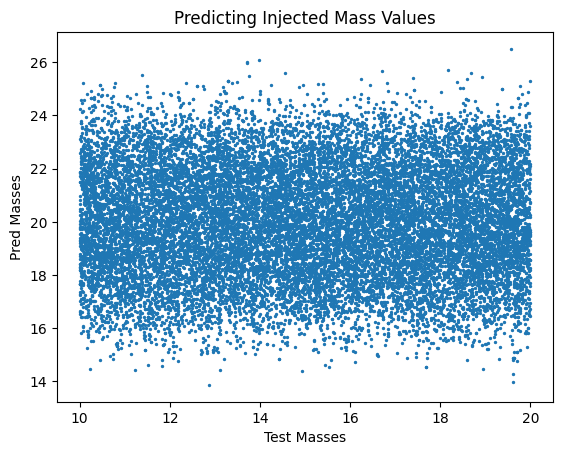

In [52]:
SimObj.plotter()

In [41]:
print(SimObj.M_inj)
print(SimObj.M_rec)

[[14.50208371]
 [14.01096365]
 [15.35098338]
 ...
 [16.38286886]
 [10.21433389]
 [15.79179866]]
[[15.55039316]
 [19.00471316]
 [19.02245309]
 ...
 [19.79100985]
 [20.51994585]
 [16.94890823]]


In [14]:
M_rec = mass_recovered_gauss_offset(5, 1)

In [15]:
M_rec

array([[13.51550965],
       [21.66515211],
       [21.33797953],
       ...,
       [19.68970642],
       [21.72512679],
       [14.17254749]])

In [16]:
def mass_recovered_offset(offset):
    M_rec_1 = M_inj + offset
    M_rec_1 = M_rec_1.reshape(-1, 1)
    return M_rec_1

In [17]:
M_rec_1 = mass_recovered_offset(5)
M_rec_1

array([[15.27145768],
       [20.9237448 ],
       [19.67648195],
       ...,
       [19.64268027],
       [21.09273463],
       [15.39698907]])

In [18]:
def mass_recovered(sigma):
    M_rec_2 = np.random.normal(M_inj, sigma)
    M_rec_2 = M_rec_2.reshape(-1, 1)
    return M_rec_2

In [19]:
M_rec_2 = mass_recovered(1)
M_rec_2

array([[10.03913282],
       [14.63190763],
       [15.5207694 ],
       ...,
       [15.11306716],
       [16.79638565],
       [10.87121868]])

In [20]:
def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                        random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [21]:
x_test, y_pred, predictor = mass_predictor(M_inj, M_rec)

/var/folders/9k/6m1gmyb90mn3rjsnkb47_8p168th5y/T/ipykernel_79960/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [22]:
x_test_1, y_pred_1, predictor = mass_predictor(M_inj, M_rec_1)

/var/folders/9k/6m1gmyb90mn3rjsnkb47_8p168th5y/T/ipykernel_79960/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [23]:
x_test_2, y_pred_2, predictor = mass_predictor(M_inj, M_rec_2)

/var/folders/9k/6m1gmyb90mn3rjsnkb47_8p168th5y/T/ipykernel_79960/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [24]:
x_test, y_pred, predictor

(array([[12.95454655],
        [17.47374601],
        [19.12095952],
        ...,
        [17.28129803],
        [14.38401031],
        [14.99927377]]),
 array([17.53305226, 22.86990505, 24.05457645, ..., 23.12066006,
        19.66462498, 19.12060159]),
 sklearn.ensemble._forest.RandomForestRegressor)

In [25]:
x_test_1, y_pred_1, predictor

(array([[12.95454655],
        [17.47374601],
        [19.12095952],
        ...,
        [17.28129803],
        [14.38401031],
        [14.99927377]]),
 array([17.95453358, 22.47359691, 24.12096906, ..., 22.28132027,
        19.38396564, 19.99929303]),
 sklearn.ensemble._forest.RandomForestRegressor)

In [26]:
x_test_2, y_pred_2, predictor

(array([[12.95454655],
        [17.47374601],
        [19.12095952],
        ...,
        [17.28129803],
        [14.38401031],
        [14.99927377]]),
 array([13.07698743, 17.8096582 , 18.82647284, ..., 18.31690282,
        13.43742704, 14.14239162]),
 sklearn.ensemble._forest.RandomForestRegressor)

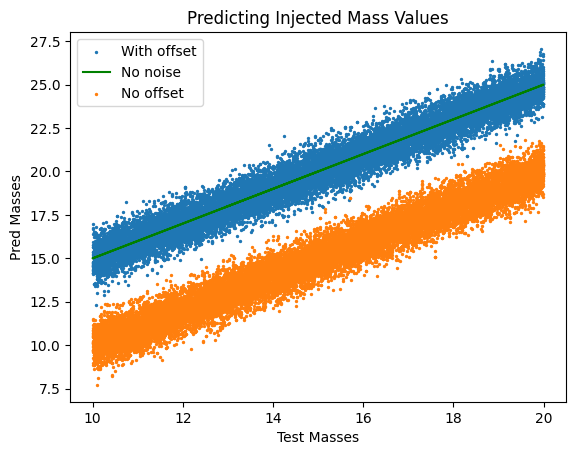

In [31]:
plt.scatter(x_test, y_pred, s=2, label="With offset") #blue is np.normal(m_inj+offset, sigma) i think it is noise
#plt.plot([10, 20], [10, 20], "r--") #red is no offset, linear line
plt.plot(x_test_1, y_pred_1, 'g', label="No noise") #the green is just offset no sigma
plt.scatter(x_test_2, y_pred_2, s=2, label="No offset") #orange is no offset, with sigma
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
plt.legend()
plt.show()

In [28]:
df1 = pd.DataFrame(data=np.column_stack((x_test, y_pred)),columns=['X_test','y_pred'])
df2 = df1.corr()
df1, df2

(          X_test     y_pred
 0      12.954547  17.533052
 1      17.473746  22.869905
 2      19.120960  24.054576
 3      17.219978  22.404888
 4      10.478266  15.256425
 ...          ...        ...
 19995  10.438295  15.583603
 19996  11.939293  17.373562
 19997  17.281298  23.120660
 19998  14.384010  19.664625
 19999  14.999274  19.120602
 
 [20000 rows x 2 columns],
           X_test    y_pred
 X_test  1.000000  0.973648
 y_pred  0.973648  1.000000)

In [29]:
def one_mass_prediction_offset(N, offset, sigma, verbose=False, plot=False):
    #we also need to modularize the code, the code is overwhelmed and performing too many actions in one function
    #its similar to trying to multitask, using multiple functions and calling them within each other makes for cleaner
    #and more efficient code
    st1 = time.time()
    #M_inj = 10 + (20 - 10)*np.random.random(N)
    #M_rec = np.random.normal(M_inj + offset, sigma)
    
    #we want to be able to make the function perform the np.random.normal(M_inj+offset, sigma), np.random.normal(M_inj, sigma), and just M_inj + offset
    #the problem is we need the detection to be able to take an input recovered mass that runs through these 
    #predictions to determine the true injected mass, eventually we want the offset to show a correlation
    #that correlation being if we have a two points with a big enough difference their offset should be showing to get worse
    #that gives us clarity that our model is getting better at predicting and acknowleding offsets are making
    #predictions worse and reducing accuracy
    
    #M_inj = M_inj.reshape(-1, 1)
    #M_rec = M_rec.reshape(-1, 1)
    
    #X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=0.20, random_state=42)
    #RandomForestRegressionModel = RandomForestRegressor()
    #RandomForestRegressionModel.fit(X_train, y_train)
    #y_pred = RandomForestRegressionModel.predict(X_test)
    if verbose:
        print(y_pred, 'y_pred')
        print(X_test, 'X_test')
    et1 = time.time()
    dt = et1 - st1
    if verbose:
        print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    if plot:
        plt.scatter(X_test, y_pred, s=2)
        plt.plot([10, 20], [10, 20], "r--")
        plt.xlabel('Test Masses')
        plt.ylabel('Pred Masses')
        plt.title("Predicting Injected Mass Values")
        #plt.plot(X_test, y_pred, color='k')
        plt.show()
    if verbose:
        mean_y_pred = np.mean(y_pred)
        print(mean_y_pred, 'average true mass prediction')
        print(np.mean(M_inj), 'avg mass injected')
        error = (((np.mean(y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
        print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
        et2 = time.time()
        dt1 = et2 - st1
        print(dt1,'total time to run')
    return df1, df2